In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output

In [4]:
def show_img(img):
    plt.style.use('dark_background')
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [80]:
def img_processing(img):
    # do something here

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 先將圖片轉為灰階
    
#     img = cv2.imread('sudoku.png',0)
#     img = cv2.medianBlur(img,5)
#     ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#     th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
#             cv2.THRESH_BINARY,11,2)
#     th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv2.THRESH_BINARY,11,2)
#     titles = ['Original Image', 'Global Thresholding (v = 127)',
#             'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
#     images = [img, th1, th2, th3]
    
#     plt.figure(figsize=(15,15)) 
#     for i in range(4):        
#         plt.subplot(2,2,i+1)
#         plt.imshow(images[i],'gray')
#         plt.title(titles[i])
# #         plt.xticks([]),plt.yticks([])
    
#     plt.show()
        
        
    # global thresholding
    ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    # Otsu's thresholding
    ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # plot all the images and their histograms
    images = [img, 0, th1,
              img, 0, th2,
              blur, 0, th3]
    titles = ['Original Noisy Image','Original Noisy Image','Gaussian filtered Image',
              'Histogram','Histogram',"Histogram", 
              'Global Thresholding (v=127)', "Otsu's Thresholding", "Otsu's Thresholding",
             'Histogram','Histogram',"Histogram"]
    plt.figure(figsize=(15,15)) 
    for i in range(3):        
        plt.subplot(4,3,0*3+i+1)
        plt.imshow(images[i*3],'gray')
        plt.title(titles[0*3+i]) #, plt.xticks([]), plt.yticks([])
        
        plt.subplot(4,3,1*3+i+1)
#         plt.hist(images[i*3].ravel(),256)
        plt.hist(images[i*3].ravel(), 256, [0, 300])
        plt.title(titles[1*3+i]) #, plt.xticks([]), plt.yticks([])
        
        plt.subplot(4,3,2*3+i+1)
        plt.imshow(images[i*3+2],'gray')
        plt.title(titles[2*3+i]) #, plt.xticks([]), plt.yticks([])
        
        plt.subplot(4,3,3*3+i+1)
#         plt.hist(images[i*3+2].ravel(),256)
        plt.hist(images[i*3+2].ravel(), 256, [0, 300])
        plt.title(titles[3*3+i]) #, plt.xticks([]), plt.yticks([])
        
    plt.show()
    
    # 將小於閾值的灰度值設為0，其他值設為最大灰度值。>127 =255, <127 =0
    ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    
    # 將大於閾值的灰度值設為0，其他值設為最大灰度值。>127 =0, <127 =255
    ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
    
    # 將大於閾值的灰度值設為閾值，小於閾值的值保持不變。 >127 =127
    ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
    
    # 將小於閾值的灰度值設為0，大於閾值的值保持不變。 <127 =0
    ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
    
    # 將大於閾值的灰度值設為0，小於閾值的值保持不變。 >127 =0
    ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
    
    # ---------------- 印出結果圖表 ---------------- #
    
    titles = ['Origin picture','cv2.THRESH_BINARY','cv2.THRESH_BINARY_INV','cv2.THRESH_TRUNC','cv2.THRESH_TOZERO','cv2.THRESH_TOZERO_INV']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
    plt.figure(figsize=(15,8)) 
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i], {'fontsize':20})
#         plt.xticks([]),plt.yticks([])
        
    plt.show()    

origin picture:


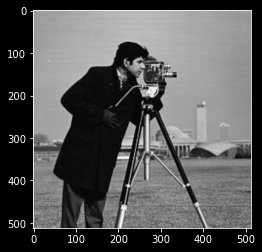

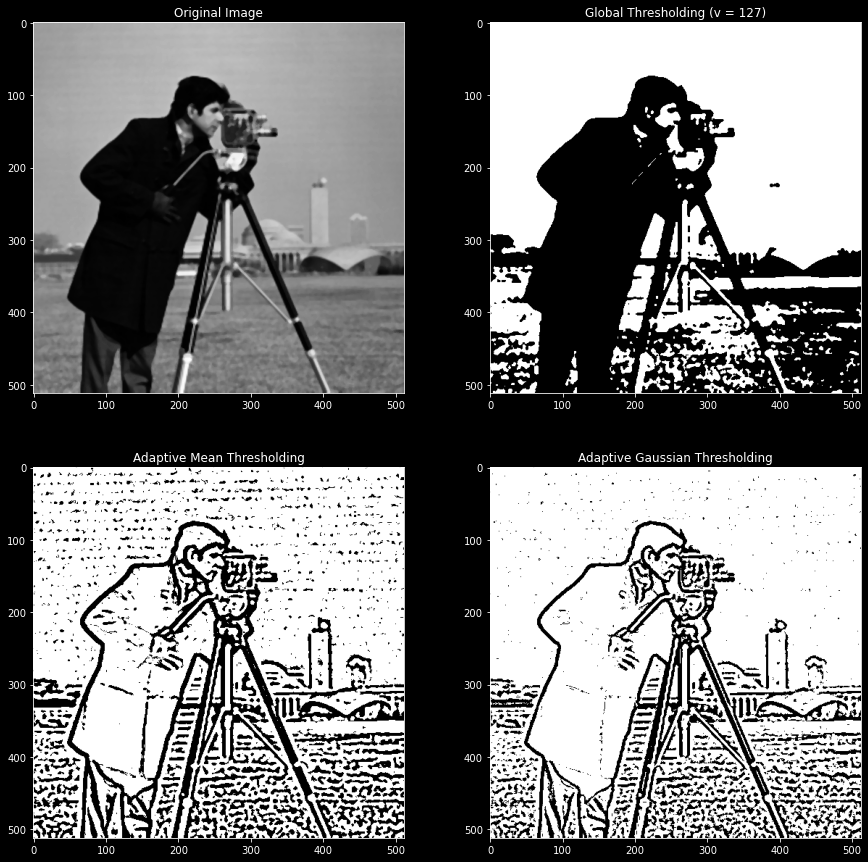

In [81]:
file_name = "./testdata/camera.jpg"
origin_img = cv2.imread(file_name)
print("origin picture:")
show_img(origin_img)

img_processing(origin_img)


# Reference

https://blog.csdn.net/on2way/article/details/46812121